Рассматрим временные ряды — последовательности значений (называемых наблюдениями), связанных с определенными моментами времени. Примерами такого рода являются котировки на момент закрытия операций на бирже, почасовые измерения температуры, изменения локации летящего самолета, годовая урожайность и квартальная прибыль компании. 

Пожалуй, самым выразительным примером временного ряда является поток твитов с временными метками, поступающих от пользователей Twitter со всего мира. 

Для формирования прогнозов на основе данных временных рядов (точнее, для прогнозирования средних январских температур в будущем и средних январских температур до 1895 года) воспользуемся методом простой линейной
регрессии и данными средней январской температуры в Нью-Йорке с 1895 по 2018 год. 


Данные, которые будут использованы в примере, представляют собой временной ряд, в котором наблюдения упорядочены по годам. Одномерные временные ряды содержат одно наблюдение на один момент времени, например среднюю январскую температуру в Нью-Йорке за конкретный год. Многомерные временные ряды содержат по два и более наблюдения на один момент времени (например, температуру, влажность и атмосферное давление в метеорологическом приложении). 

С временными рядами часто выполняются две операции:
* Анализ временных рядов выявляет закономерности в существующих данных временных рядов, помогая аналитикам понять суть данных. Стандартная аналитическая задача — выявление сезонности в данных. Например, в Нью-Йорке ежемесячная температура существенно изменяется в зависимости от времени года (зима, весна, лето или осень).
* Прогнозирование временных рядов использует прошлые данные для прогнозирования будущего.

Рассматрим прогнозирование временных рядов.

#### Простая линейная регрессия

При помощи метода, называемого простой линейной регрессией, построим прогнозы, выявляющие линейные отношения между месяцами (январь каждого года) и средней температурой в Нью-Йорке. Для заданной коллекции значений, представляющих независимую переменную (комбинация «месяц/год») и зависимую переменную (средняя температура за этот месяц/год), простая линейная регрессия описывает отношение между этими переменными прямой линией — регрессионной прямой.

#### Линейные отношения

Чтобы понять общую концепцию линейных отношений, рассмотрим температуры по шкале Фаренгейта и Цельсия. Для заданной температуры по Фаренгейту соответствующая температура по Цельсию вычисляется по следующей формуле:

c = 5 / 9 * (f - 32)

В этой формуле f (температура по Фаренгейту) — независимая переменная, а c (температура по Цельсию) — зависимая переменная; каждое значение c зависит от значения f, использованного при вычислении.

График температур по Фаренгейту и соответствующих им температур по Цельсию представляет собой прямую линию. Чтобы убедиться в этом, сначала создадим лямбда-выражение для предыдущей формулы и воспользуемся им для вычисления эквивалентов по шкале Цельсия для температур по Фаренгейту 0–100 с приращением 10 градусов. Каждая пара температур по Фаренгейту/Цельсию будет храниться в виде кортежа в temps:

In [1]:
c = lambda f: 5 / 9 * (f - 32)

In [2]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

Поместим данные в DataFrame и используем метод plot для вывода линейной зависимости между температурами по Фаренгейту и по Цельсию. Ключевой аргумент style метода plot управляет внешним видом данных. Точка в строке '.-' указывает, что каждая точка данных должна обозначаться точкой на графике, а дефис — что точки должны соединяться линиями. Оси y вручную назначается метка 'Celsius', потому что метод plot по умолчанию выводит 'Celsius' только в левом верхнем углу условных обозначений на графике:

In [3]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

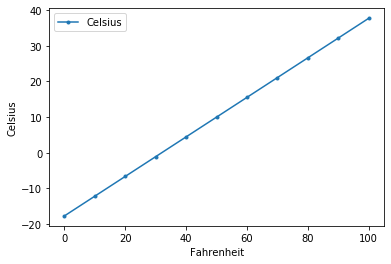

In [4]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

#### Компоненты уравнения простой линейной регрессии

Точки на любой прямой линии (в двумерном пространстве) могут быть описаны уравнением:

y = mx + b,

где 
* m — коэффициент наклона линии;
* b — точка пересечения линии с осью y (при x = 0);
* x — независимая переменная (дата в нашем примере);
* y — зависимая переменная (температура в нашем примере).

В простой линейной регрессии y — прогнозируемое значение для заданного x.

#### Функция linregress из модуля stats библиотеки SciPy

Простая линейная регрессия определяет коэффициент наклона (m) и точку пересечения (b) прямой линии, лучше всего подходящую к вашим данным. На следующей диаграмме показаны некоторые точки данных временного ряда:

In [ ]:
lin.png

Алгоритм простой линейной регрессии производит итерационную настройку угла наклона и точки пересечения, вычисляя для каждой корректировки квадрат расстояния каждой точки от линии. «Наилучшая подгонка» достигается, когда значения угла наклона и точки пересечения минимизируют сумму квадратов расстояний. Этот принцип называется обычным методом наименьших квадратов.

Библиотека SciPy (Scientific Python) широко применяется в инженерных, научных и математических вычислениях на языке Python. Функция linregress этой библиотеки (из модуля scipy.stats ) выполняет простую линейную регрессию за вас. После вызова linregress остается подставить полученные значения угла наклона и точки пересечения в формулу y = mx + b для получения прогноза.

В этом примере мы загрузим данные средних январских температур в Нью-Йорке в 1895–2018 годах из CSV-файла в DataFrame. Библиотека Seaborn будет использована для графического представления данных DataFrame в виде регрессионной прямой, представляющей график изменения средней температуры за период 1895–2018 годов.

#### Получение метеорологических данных от NOAA

Загрузим данные для исследования. [Национальное управление по исследованию океанов и атмосферы](http://www.noaa.gov) (NOAA, National Oceanic and Atmospheric Administration, или Национальное управление по исследованию океанов и атмосферы) предоставляет доступ к обширным статистическим данным, включая временные ряды для средних температур в конкретных городах с различными интервалами времени.

Мы получили средние январские температуры в Нью-Йорке с 1895 по 2018 год из временных рядов [NOAA «Climate at a Glance»](https://www.ncdc.noaa.gov/cag/).

На этой веб-странице можно выбрать температуру, уровень осадков и другие данные для целых регионов США, штатов, городов и т. д. Выбрав зону и период времени, щелкните на кнопке Plot, чтобы вывести диаграмму и просмотреть таблицу с выбранными данными. В верхней части таблицы размещаются ссылки для загрузки данных в нескольких форматах, включая формат CSV. 

Данные (ave_hi_nyc_jan_1895-2018.csv) содержат три столбца для каждого наблюдения:

* Date — значение в форме 'YYYYMM' (например, '201801'). Часть MM всегда содержит 01 , потому что мы загружали данные только за январь каждого года.
* Value — температура по Фаренгейту в формате с плавающей точкой. 
* Anomaly — разность между значением для заданной даты и средними значениями для всех дат. В нашем примере значение Anomaly не используется, поэтому мы его проигнорируем.

Загрузим и выведем данные для Нью-Йорка:

In [6]:
nyc = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/ml/master/datasets/ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Очистка данных

Скоро мы воспользуемся Seaborn для графического представления пар DateValue и регрессионной прямой. При отображении данных из DataFrame Seaborn помечает оси графика именами столбцов DataFrame. Для удобочитаемости переименуем столбец 'Value' в 'Temperature':

In [8]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [9]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Seaborn помечает деления на оси x значениями Date. Поскольку в примере обрабатываются только январские данные, метки оси x будут лучше читаться без обозначения 01 (для января); удалим его из Date. 

Сначала проверим тип столбца:

In [10]:
nyc.Date.dtype

dtype('int64')

Значения являются целыми числами, поэтому мы можем разделить их на 100 для отсечения двух последних цифр. Вспомните, что каждый столбец в DataFrame представляет собой коллекцию Series. Вызов метода floordiv коллекции Series выполняет целочисленное деление с каждым элементом Series:

In [11]:
nyc.Date = nyc.Date.floordiv(100)

In [12]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Вычисление базовых описательных статистик для наборов данных

Чтобы быстро получить некоторые статистики для температур из набора данных, вызовем describe для столбца Temperature . В коллекции присутствуют 124 наблюдения, среднее значение наблюдений равно 37.60, а наименьшее и наибольшее наблюдение равны 26.10 и 47.60 градусам соответственно:

In [13]:
pd.set_option('precision', 2)

In [14]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Прогнозирование будущих январских температур

Библиотека SciPy (Scientific Python) широко применяется в инженерных, научных и математических вычислениях на языке Python. Ее модуль stats предоставляет функцию linregress , которая вычисляет наклон и точку пересечения регрессионной прямой для заданного набора точек данных:

In [15]:
from scipy import stats

In [16]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

Функция linregress получает два одномерных массива одинаковой длины, представляющих координаты x и y точек данных. Ключевые аргументы x и y представляют независимые и зависимые переменные соответственно. Объект, возвращаемый linregress, содержит угол наклона и точку пересечения регрессионной прямой:

In [17]:
linear_regression.slope

0.014771361132966163

In [18]:
linear_regression.intercept

8.694993233674289

Эти значения можно объединить с уравнением простой линейной регрессии для прямой линии, y = mx + b при прогнозировании средней январской температуры в Нью-Йорке для заданного года. Спрогнозируем среднюю температуру по Фаренгейту за январь 2019 года. В следующих вычислениях linear_regression.slope соответствует m, 2019 соответствует x (значение, для которого прогнозируется температура), а linear_regression.intercept соответствует b:

In [19]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

Также по формуле можно приближенно оценить, какой могла быть средняя температура до 1895 года. Например, оценка средней температуры за январь 1890 года может быть получена следующим образом:

In [20]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

Напомним, в примере были доступны данные за 1895–2018 годы, и чем дальше вы выходите за границы диапазона, тем менее надежными становятся прогнозы.

#### Построение графика со средними температурами и регрессионной прямой
 
даты представляются на оси x, а температуры на оси y. Функция regplot строит диаграмму разброса данных, на которой точки представляют температуры за заданный год, а прямая линия — регрессионную прямую. 

Ключевые аргументы x и y функции regplot — одномерные массивы совпадающей длины, представляющие пары координат x-y для нанесения на график:

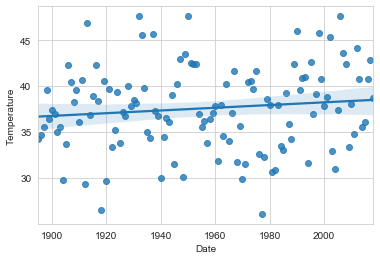

In [21]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

Затененная область рядом с регрессионной прямой демонстрирует 95-процентный [доверительный интервал для регрессионной прямой](https://en.wikipedia.org/wiki/Simple_linеar_regression#Confidence_intervals). Для вывода графика без доверительного интервала добавьте ключевой аргумент ci=None в список аргументов функции regplot.

Наклон регрессионной прямой (подъем от левой части к правой) указывает на то, что в последние 124 года средняя температура повышалась. На графике ось y представляет температурный диапазон между минимумом 26.1 и максимумом 47.6 по Фаренгейту, в результате чего наблюдается значительный разброс данных вокруг регрессионной прямой, из-за которого труднее выявить линейную связь. Эта проблема типична для визуализаций в области аналитики данных. Если оси на графике отражают разные типы данных (даты и температуры в данном случае), то как разумно определить их относительные масштабы? 

На предыдущем графике все определяется исключительно высотой графика — Seaborn и Matplotlib автоматически масштабируют оси на основании диапазонов значений данных. Ось значений y можно масштабировать, чтобы подчеркнуть линейность отношения. В следующем примере ось y была масштабирована от 21,5-градусного диапазона до 60-градусного диапазона (от 10 до 70 градусов):

In [22]:
axes.set_ylim(10, 70)

(10, 70)

(10, 70)

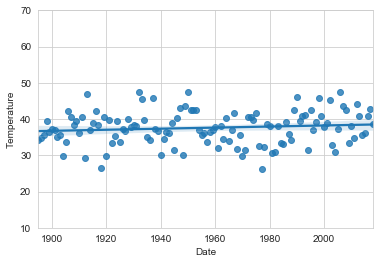

In [25]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)